In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [215]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

role = get_execution_role()

bucket='dabba10'
data_key = 'data/2020/05/05/07/Earthquake.parquet'
data_location = 's3://{}/{}'.format(bucket, data_key)

df1e=pd.read_parquet(data_location)
df1e.head()

,x,y,z
0,-0.064043,-0.044506,9.456333
1,-0.052072,-0.092388,9.973458
2,-0.087984,-0.078024,9.525763
3,-0.061649,-0.070842,10.02374
4,-0.076013,-0.07563,9.410846


In [216]:
data_key = 'data/2020/05/07/12/earthquake_vertical.parquet'
data_location = 's3://{}/{}'.format(bucket, data_key)

df2e=pd.read_parquet(data_location)
df2e.head()

,x,y,z
0,-0.020949,9.570194,1.230211
1,-0.037708,9.586952,1.244576
2,-0.028131,9.572588,1.314004
3,-0.037708,9.582165,1.285275
4,-0.064043,9.582165,1.316398


In [217]:
data_key = 'data/2020/05/07/12/earthquakexz.parquet'
data_location = 's3://{}/{}'.format(bucket, data_key)

df3e=pd.read_parquet(data_location)
df3e.head()

,x,y,z
0,9.694304,-0.202517,0.459311
1,9.65121,-0.161817,0.461705
2,9.627269,-0.188152,0.492828
3,9.687122,-0.171394,0.399459
4,9.684727,-0.171394,0.380306


In [218]:
role = get_execution_role()

bucket='dabba10'
data_key = 'data/2020/05/11/08/1earthquake.parquet'
data_location = 's3://{}/{}'.format(bucket, data_key)

df4e=pd.read_parquet(data_location)

In [219]:
role = get_execution_role()

bucket='dabba10'
data_key = 'data/2020/05/11/08/2earthquake.parquet'
data_location = 's3://{}/{}'.format(bucket, data_key)

df5e=pd.read_parquet(data_location)

In [220]:
df1e["Sl.no"]= np.arange(len(df1e))
df2e["Sl.no"]= np.arange(len(df2e))
df3e["Sl.no"]= np.arange(len(df3e))
df4e["Sl.no"]= np.arange(len(df4e))
df5e["Sl.no"]= np.arange(len(df5e))

df1e.head()


,x,y,z,Sl.no
0,-0.064043,-0.044506,9.456333,0
1,-0.052072,-0.092388,9.973458,1
2,-0.087984,-0.078024,9.525763,2
3,-0.061649,-0.070842,10.02374,3
4,-0.076013,-0.07563,9.410846,4


In [221]:
df1e = df1e.reindex(columns=['Sl.no',"x","y","z"])
df2e = df2e.reindex(columns=['Sl.no',"x","y","z"])
df3e = df3e.reindex(columns=['Sl.no',"x","y","z"])
df4e = df4e.reindex(columns=['Sl.no',"x","y","z"])
df5e = df5e.reindex(columns=['Sl.no',"x","y","z"])
df1e.head()


,Sl.no,x,y,z
0,0,-0.064043,-0.044506,9.456333
1,1,-0.052072,-0.092388,9.973458
2,2,-0.087984,-0.078024,9.525763
3,3,-0.061649,-0.070842,10.02374
4,4,-0.076013,-0.07563,9.410846


plots before filtering the data

Text(0, 0.5, 'Z acceleration')

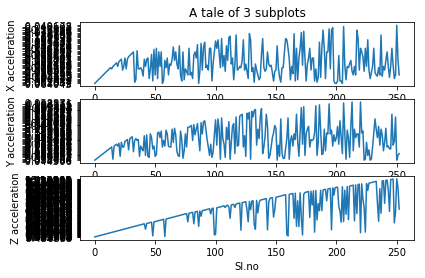

In [222]:
xs=df1e["Sl.no"]
plt.subplot(3, 1, 1)
plt.plot(xs,df1e["x"])
plt.title('A tale of 3 subplots')
plt.ylabel('X acceleration')

plt.subplot(3, 1, 2)
plt.plot(xs, df1e["y"])
plt.xlabel('Sl.no')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(xs, df1e["z"] )
plt.xlabel('Sl.no')
plt.ylabel('Z acceleration')

Text(0, 0.5, 'Z acceleration')

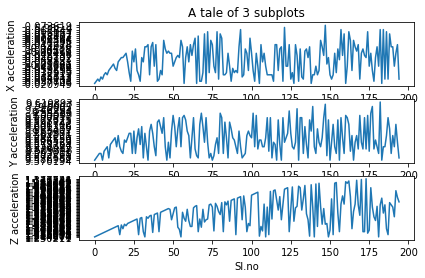

In [223]:
xs=df2e["Sl.no"]
plt.subplot(3, 1, 1)
plt.plot(xs,df2e["x"])
plt.title('A tale of 3 subplots')
plt.ylabel('X acceleration')

plt.subplot(3, 1, 2)
plt.plot(xs, df2e["y"])
plt.xlabel('Sl.no')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(xs, df2e["z"] )
plt.xlabel('Sl.no')
plt.ylabel('Z acceleration')

Text(0, 0.5, 'Z acceleration')

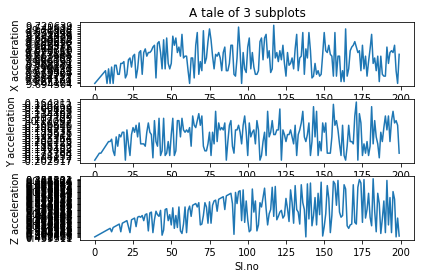

In [224]:
xs=df3e["Sl.no"]
plt.subplot(3, 1, 1)
plt.plot(xs,df3e["x"])
plt.title('A tale of 3 subplots')
plt.ylabel('X acceleration')

plt.subplot(3, 1, 2)
plt.plot(xs, df3e["y"])
plt.xlabel('Sl.no')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(xs, df3e["z"] )
plt.xlabel('Sl.no')
plt.ylabel('Z acceleration')

In [225]:
def filter(val):

    lx=val
    x=lx.tolist()
    for i in range(len(x)):
        x[i]=float(x[i])
    w=50
    wh=int(w/2)
    l=len(x)
    i=0
    tx=[]
    mx=[]

    while i<l:
        if i<=wh:
            tx.append(sum(x[0:i])+sum(x[i:(wh+i)]))
            mx.append(tx[i]/(wh+i))
          

        elif wh<i<=l-wh:          
            tx.append(sum(x[i-wh:i])+sum(x[i:i+wh]))
            mx.append(tx[i]/w)
    #            print(i,tx[i])

        elif i>l-wh:
            tx.append(sum(x[i-wh:i])+sum(x[i:l+1]))
            mx.append(tx[i]/(wh+len(x[i:l+1])))
    #            print(i,tx[i])
        i=i+1   
    return mx


In [226]:
df1e["xf"]=filter(df1e["x"])
df1e["yf"]=filter(df1e["y"])
df1e["zf"]=filter(df1e["z"])
df2e["xf"]=filter(df2e["x"])
df2e["yf"]=filter(df2e["y"])
df2e["zf"]=filter(df2e["z"])
df3e["xf"]=filter(df3e["x"])
df3e["yf"]=filter(df3e["y"])
df3e["zf"]=filter(df3e["z"])
df4e["xf"]=filter(df4e["x"])
df4e["yf"]=filter(df4e["y"])
df4e["zf"]=filter(df4e["z"])
df5e["xf"]=filter(df5e["x"])
df5e["yf"]=filter(df5e["y"])
df5e["zf"]=filter(df5e["z"])

Text(0, 0.5, 'Zacceleration')

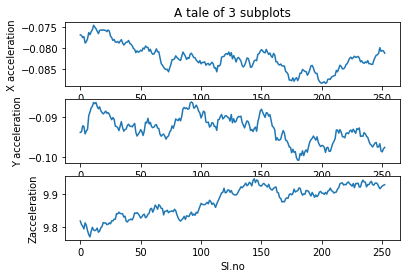

In [227]:
xs=df1e["Sl.no"]
plt.subplot(3, 1, 1)
plt.plot(xs,df1e["xf"])
plt.title('A tale of 3 subplots')
plt.ylabel('X acceleration')

plt.subplot(3, 1, 2)
plt.plot(xs, df1e["yf"])
plt.xlabel('Sl.no')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(xs, df1e["zf"] )
plt.xlabel('Sl.no')
plt.ylabel('Zacceleration')

Text(0, 0.5, 'Zacceleration')

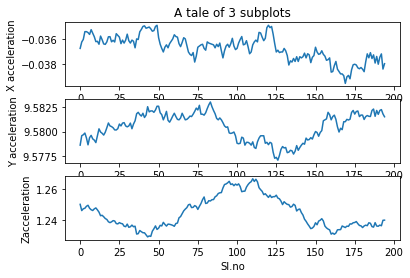

In [228]:
xs=df2e["Sl.no"]
plt.subplot(3, 1, 1)
plt.plot(xs,df2e["xf"])
plt.title('A tale of 3 subplots')
plt.ylabel('X acceleration')

plt.subplot(3, 1, 2)
plt.plot(xs, df2e["yf"])
plt.xlabel('Sl.no')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(xs, df2e["zf"] )
plt.xlabel('Sl.no')
plt.ylabel('Zacceleration')

Text(0, 0.5, 'Zacceleration')

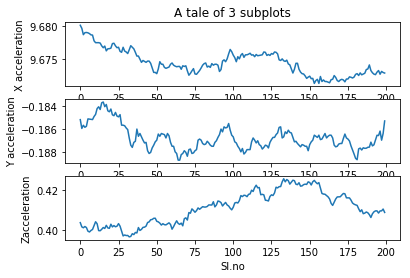

In [229]:
xs=df3e["Sl.no"]
plt.subplot(3, 1, 1)
plt.plot(xs,df3e["xf"])
plt.title('A tale of 3 subplots')
plt.ylabel('X acceleration')

plt.subplot(3, 1, 2)
plt.plot(xs, df3e["yf"])
plt.xlabel('Sl.no')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(xs, df3e["zf"] )
plt.xlabel('Sl.no')
plt.ylabel('Zacceleration')

graphs of filtered data

In [230]:
dfe=pd.concat([df1e,df2e,df3e,df4e,df5e])
dfe.head()

,Sl.no,x,y,z,xf,yf,zf
0,0,-0.064043,-0.044506,9.456333,-0.076779,-0.093825,9.817077
1,1,-0.052072,-0.092388,9.973458,-0.076934,-0.093678,9.806609
2,2,-0.087984,-0.078024,9.525763,-0.077432,-0.092211,9.801616
3,3,-0.061649,-0.070842,10.02374,-0.077210,-0.092388,9.793132
4,4,-0.076013,-0.07563,9.410846,-0.078737,-0.094205,9.811734


In [231]:
dfe.drop(columns="Sl.no",inplace=True)
dfe["Sl.no"]= np.arange(len(dfe))


In [232]:
dfe=dfe.reindex(columns=("Sl.no","x","y","z","xf","yf","zf","Activity"))

In [233]:
dfe.tail()

,Sl.no,x,y,z,xf,yf,zf,Activity
176,1024,-0.016161,-0.137876,9.868118,0.002034,-0.133727,9.833644,NaN
177,1025,-0.030525,-0.121118,9.76996,0.001836,-0.134079,9.830887,NaN
178,1026,0.005386,-0.130694,9.83939,0.002052,-0.134627,9.829728,NaN
179,1027,0.005386,-0.152241,9.779536,0.003169,-0.134152,9.822897,NaN
180,1028,0.017357,-0.1283,9.645468,0.000874,-0.135022,9.827051,NaN


In [234]:
a=[]
for i in range(len(dfe)):
    a.append("Earthquake")
dfe["Activity"]=a    


In [235]:
dfe.tail()

,Sl.no,x,y,z,xf,yf,zf,Activity
176,1024,-0.016161,-0.137876,9.868118,0.002034,-0.133727,9.833644,Earthquake
177,1025,-0.030525,-0.121118,9.76996,0.001836,-0.134079,9.830887,Earthquake
178,1026,0.005386,-0.130694,9.83939,0.002052,-0.134627,9.829728,Earthquake
179,1027,0.005386,-0.152241,9.779536,0.003169,-0.134152,9.822897,Earthquake
180,1028,0.017357,-0.1283,9.645468,0.000874,-0.135022,9.827051,Earthquake


In [236]:
dfe.describe()

,Sl.no,xf,yf,zf
count,1029.000000,1029.000000,1029.000000,1029.000000
mean,514.000000,1.858073,1.710425,6.384684
std,297.191016,3.841254,3.807488,4.400206
min,0.000000,-0.088415,-0.188679,0.396777
25%,257.000000,-0.038929,-0.132466,1.236531
50%,514.000000,0.001268,-0.116425,9.817986
75%,771.000000,0.028322,-0.090377,9.847960
max,1028.000000,9.680131,9.583026,9.947124


In [237]:
dfe.isnull().sum()

Sl.no       0
x           0
y           0
z           0
xf          0
yf          0
zf          0
Activity    0
dtype: int64

In [239]:
data_key = 'data/2020/05/07/10/ontable.parquet'
data_location = 's3://{}/{}'.format(bucket, data_key)

df1n=pd.read_parquet(data_location)


In [240]:
data_key = 'data/2020/05/07/11/pocket_walking.parquet'
data_location = 's3://{}/{}'.format(bucket, data_key)

df2n=pd.read_parquet(data_location)

In [241]:
data_key = 'data/2020/05/07/11/walking_hand.parquet'
data_location = 's3://{}/{}'.format(bucket, data_key)

df3n=pd.read_parquet(data_location)

In [242]:
df1n["xf"]=filter(df1n["x"])
df1n["yf"]=filter(df1n["y"])
df1n["zf"]=filter(df1n["z"])
df2n["xf"]=filter(df2n["x"])
df2n["yf"]=filter(df2n["y"])
df2n["zf"]=filter(df2n["z"])
df3n["xf"]=filter(df3n["x"])
df3n["yf"]=filter(df3n["y"])
df3n["zf"]=filter(df3n["z"])

In [243]:
dfn=pd.concat([df1n,df2n,df3n])
dfn.head()

,x,y,z,xf,yf,zf
0,0.879232,2.639278,9.231289,0.490048,3.427894,9.189057
1,0.951055,2.689554,9.202559,0.504372,3.400141,9.245837
2,0.996543,2.902629,9.102008,0.509832,3.382158,9.248402
3,1.006119,2.751801,9.192983,0.498998,3.412316,9.177763
4,0.958238,2.553091,9.322265,0.538940,3.520637,9.123471


In [244]:
a=[]
for i in range(len(dfn)):
    a.append("no-Earthquake")
dfn["Activity"]=a    


In [245]:
dfn["Sl.no"]= np.arange(len(dfn))
dfn=dfn.reindex(columns=("Sl.no","x","y","z","xf","yf","zf","Activity"))
dfn.head()

,Sl.no,x,y,z,xf,yf,zf,Activity
0,0,0.879232,2.639278,9.231289,0.490048,3.427894,9.189057,no-Earthquake
1,1,0.951055,2.689554,9.202559,0.504372,3.400141,9.245837,no-Earthquake
2,2,0.996543,2.902629,9.102008,0.509832,3.382158,9.248402,no-Earthquake
3,3,1.006119,2.751801,9.192983,0.498998,3.412316,9.177763,no-Earthquake
4,4,0.958238,2.553091,9.322265,0.538940,3.520637,9.123471,no-Earthquake


In [246]:
dfn.describe()

,Sl.no,xf,yf,zf
count,600.000000,600.000000,600.000000,600.000000
mean,299.500000,-1.414444,-4.111281,3.582561
std,173.349358,5.379869,3.918458,4.282318
min,0.000000,-9.291665,-9.263750,-0.306848
25%,149.750000,-8.587190,-7.515579,0.085125
50%,299.500000,0.042447,-5.072593,0.877608
75%,449.250000,3.998276,-0.140366,9.121881
max,599.000000,4.560494,3.662899,9.857567


In [247]:
dfn.isnull().sum()

Sl.no       0
x           0
y           0
z           0
xf          0
yf          0
zf          0
Activity    0
dtype: int64

In [248]:
df=pd.concat([dfe,dfn])
print(df.head())
print(df.tail())

   Sl.no          x          y         z        xf        yf        zf  \
0      0  -0.064043  -0.044506  9.456333 -0.076779 -0.093825  9.817077   
1      1  -0.052072  -0.092388  9.973458 -0.076934 -0.093678  9.806609   
2      2  -0.087984  -0.078024  9.525763 -0.077432 -0.092211  9.801616   
3      3  -0.061649  -0.070842  10.02374 -0.077210 -0.092388  9.793132   
4      4  -0.076013   -0.07563  9.410846 -0.078737 -0.094205  9.811734   

     Activity  
0  Earthquake  
1  Earthquake  
2  Earthquake  
3  Earthquake  
4  Earthquake  
     Sl.no          x          y          z        xf        yf        zf  \
195    595  -10.59329  -4.212633  -1.082489 -8.980704 -5.027504 -0.077685   
196    596  -8.263831  -4.387402  -0.349894 -9.094253 -5.024232 -0.101816   
197    597  -7.875987  -5.526992   0.174413 -9.123055 -5.018674 -0.090990   
198    598  -7.418714  -4.418525  -0.713797 -9.075519 -5.002685 -0.100287   
199    599  -7.461808  -4.765669  -0.498328 -9.181783 -4.998265 -0.145751 

In [249]:
df.drop(columns="Sl.no",inplace=True)
df["Sl.no"]= np.arange(len(df))
df=df.reindex(columns=("Sl.no","x","y","z","xf","yf","zf","Activity"))

In [250]:
df.head()

,Sl.no,x,y,z,xf,yf,zf,Activity
0,0,-0.064043,-0.044506,9.456333,-0.076779,-0.093825,9.817077,Earthquake
1,1,-0.052072,-0.092388,9.973458,-0.076934,-0.093678,9.806609,Earthquake
2,2,-0.087984,-0.078024,9.525763,-0.077432,-0.092211,9.801616,Earthquake
3,3,-0.061649,-0.070842,10.02374,-0.077210,-0.092388,9.793132,Earthquake
4,4,-0.076013,-0.07563,9.410846,-0.078737,-0.094205,9.811734,Earthquake


In [264]:
df.describe()

,Sl.no,xf,yf,zf
count,1629.00000,1629.000000,1629.000000,1629.000000
mean,814.00000,0.652726,-0.433850,5.352595
std,470.39611,4.739150,4.763799,4.560841
min,0.00000,-9.291665,-9.263750,-0.306848
25%,407.00000,-0.079748,-0.188152,0.417989
50%,814.00000,0.009983,-0.130823,8.867768
75%,1221.00000,0.913276,-0.093137,9.841448
max,1628.00000,9.680131,9.583026,9.947124


In [251]:
x1=df.iloc[:,4:7]
y1=df["Activity"]

In [252]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=42,shuffle=True)

In [253]:
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

           xf        yf        zf
22   0.003145 -0.130643  9.842548
181 -0.087074 -0.100672  9.918730
71   0.741859  0.385761  9.455089
196  0.034446 -0.138702  9.857139
165  0.018602 -0.118963  9.866778
22        Earthquake
181       Earthquake
71     no-Earthquake
196    no-Earthquake
165       Earthquake
Name: Activity, dtype: object
           xf        yf        zf
21   0.004710 -0.127936  9.846988
251 -0.080624 -0.097886  9.927173
90   9.674050 -0.186716  0.414637
47  -0.035313  9.581973  1.234137
99  -0.036846  9.579579  1.263393
21     Earthquake
251    Earthquake
90     Earthquake
47     Earthquake
99     Earthquake
Name: Activity, dtype: object


In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from random import seed
from sklearn.model_selection import cross_val_score





In [255]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(X_test.shape,y_test.shape)
print(score)

(538, 3) (538,)
0.879182156133829


/home/ec2-user/anaconda3/envs/chainer_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [256]:
bucket='dabba10'
data_key = 'data/2020/05/11/04/testing.parquet'
data_location = 's3://{}/{}'.format(bucket, data_key)

df_test=pd.read_parquet(data_location)
df_test.head()

,x,y,z
0,-0.00419,-0.085206,9.772354
1,0.081997,-0.097177,10.10753
2,-0.140654,-0.164211,10.07641
3,0.034115,-0.101965,9.844177
4,0.10115,-0.080418,9.688561


TEST YOUR DATA HERE

In [257]:
df_test["xf"]=filter(df_test["x"])
df_test["yf"]=filter(df_test["y"])
df_test["zf"]=filter(df_test["z"])
df_test.head()

,x,y,z,xf,yf,zf
0,-0.00419,-0.085206,9.772354,-0.010606,-0.121501,9.864863
1,0.081997,-0.097177,10.10753,-0.011280,-0.122499,9.854215
2,-0.140654,-0.164211,10.07641,-0.010308,-0.122891,9.849764
3,0.034115,-0.101965,9.844177,-0.012228,-0.124281,9.861621
4,0.10115,-0.080418,9.688561,-0.012858,-0.125328,9.879347


In [258]:
test=df_test.iloc[:,3:6]
test.head()

,xf,yf,zf
0,-0.010606,-0.121501,9.864863
1,-0.011280,-0.122499,9.854215
2,-0.010308,-0.122891,9.849764
3,-0.012228,-0.124281,9.861621
4,-0.012858,-0.125328,9.879347


In [265]:
predictions = logisticRegr.predict(test)
predictions[0:10]

array(['Earthquake', 'Earthquake', 'Earthquake', 'Earthquake',
       'Earthquake', 'Earthquake', 'Earthquake', 'Earthquake',
       'Earthquake', 'Earthquake'], dtype=object)

In [260]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the classifier to the data
knn.fit(X_train,y_train)
print(knn.predict(X_test)[0:5])
print(knn.score(X_test, y_test))


['Earthquake' 'Earthquake' 'Earthquake' 'Earthquake' 'Earthquake']
1.0


In [261]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.model_selection import train_test_split

In [262]:
classifiers=[]
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [263]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf,acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is 0.9200743494423792
Confusion Matrix of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is [[342   0]
 [ 43 153]]
Accuracy of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') is 0.9888475836431226
Confusion Matrix of DecisionTreeClassifier(class_weight=None, cr

/home/ec2-user/anaconda3/envs/chainer_p36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ec2-user/anaconda3/envs/chainer_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
